In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
import warnings
warnings.filterwarnings(action='ignore')

## Question 1. 

Let's explore clustering models on an artificial data set with five features.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data= pd.read_csv('/content/drive/My Drive/Untitled folder/hw4data1.csv')
data.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,2.090884,7.405251,2.450357,3.191506,2.426240
2,2.498841,7.292161,2.468256,2.975176,2.710137
3,2.009998,7.408158,2.486901,2.863235,2.561799
4,2.236813,7.245803,2.181933,2.825106,2.599706


In [4]:
data.columns = ["A", "B", "C", "D", "E"]
data.head()

,A,B,C,D,E
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,2.090884,7.405251,2.450357,3.191506,2.426240
2,2.498841,7.292161,2.468256,2.975176,2.710137
3,2.009998,7.408158,2.486901,2.863235,2.561799
4,2.236813,7.245803,2.181933,2.825106,2.599706


#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_values = data.values
scaled_data = scaler.fit_transform(data_values)
normalized_data = pd.DataFrame(scaled_data)

In [6]:
normalized_data.describe()

,0,1,2,3,4
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-6.661338e-18,-4.773959e-17,1.953993e-16,-9.547918e-17,-4.440892e-18
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.665562e+00,-1.238114e+00,-1.772224e+00,-1.772609e+00,-1.768990e+00
25%,-5.019173e-01,-7.555512e-01,-8.268695e-01,-7.207487e-01,-7.111307e-01
50%,8.715160e-02,-3.172191e-01,1.080302e-01,1.022621e-01,1.452977e-01
75%,7.818621e-01,3.476006e-01,8.826871e-01,8.404849e-01,8.508535e-01
max,1.269125e+00,1.767590e+00,1.672280e+00,1.633046e+00,1.671845e+00


In [0]:
u,s,v = np.linalg.svd(normalized_data)

In [8]:
for k in range(0, len(normalized_data.columns)):
  print("For K = {} ---> variance retained is {}".format(k, s[k]/s.sum()))

For K = 0 ---> variance retained is 0.6430005025538671
For K = 1 ---> variance retained is 0.20527941703154506
For K = 2 ---> variance retained is 0.0607154628974783
For K = 3 ---> variance retained is 0.04943916309730539
For K = 4 ---> variance retained is 0.04156545441980416



# There is no point in implementing PCA. The highest percent of variance that can be retained is 64.30%

# However, implementing PCA with 2 components

In [0]:
#this
from sklearn.decomposition import PCA

pcdat = PCA(n_components = 2).fit_transform(normalized_data)


In [10]:
nd = pd.DataFrame(pcdat)
nd.index = data.index
nd.columns = ['PC1', 'PC2']
nd.head()

,PC1,PC2
0,0.510642,0.417088
1,-2.743279,-0.753203
2,-2.807171,-0.640288
3,-2.688149,-0.767065
4,-2.606136,-0.683608


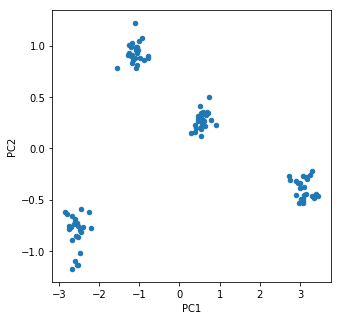

In [11]:
ax = nd.plot(kind='scatter', x='PC1', y='PC2', figsize = (5,5))

## Looking at the data from PCA transformation, it is safe to assume that an initial guess of k = 4 should do the trick.


In [0]:
#performing k-means
from sklearn.cluster import KMeans

#creating a k-means model with 4 clusters
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=428)
kmeans.fit(nd)
labels = kmeans.predict(nd)

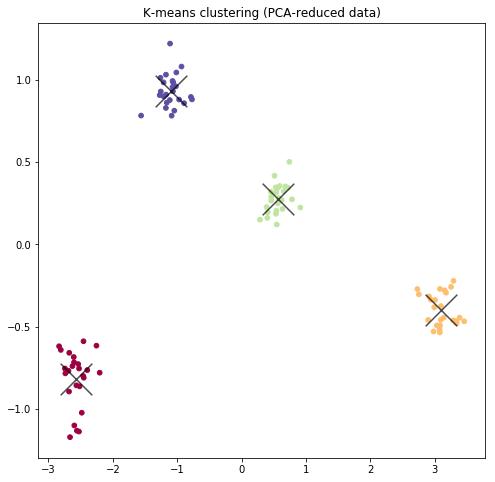

In [13]:
#plot
plt.clf
plt.figure(figsize = (8,8))
centers = kmeans.cluster_centers_
plt.scatter(np.asarray(nd.loc[:, 'PC1']), np.asarray(nd.loc[:, 'PC2']), c=labels, s=22, cmap='Spectral')
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='black', s=1000, alpha=0.7);
plt.title('K-means clustering (PCA-reduced data)')
plt.show()

## Finding the S-Scores and Elbow plots

In [14]:
info = {}
for num in range(2,10):
  k_means = KMeans(n_clusters=num, max_iter=1000, random_state=55).fit(nd)
  labels = k_means.labels_
  s_score = silhouette_score(nd, labels)
  print("S-score for cluster {} is {}".format(num,s_score))

S-score for cluster 2 is 0.6093029782970728
S-score for cluster 3 is 0.7455101910713924
S-score for cluster 4 is 0.8821714922362172
S-score for cluster 5 is 0.7820319915609574
S-score for cluster 6 is 0.6095526652944923
S-score for cluster 7 is 0.66330025213264
S-score for cluster 8 is 0.5004286875989709
S-score for cluster 9 is 0.3679457126551035


In [0]:

def elbow(data,K):
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    centroids = [k.cluster_centers_ for k in KM]
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'r*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b^-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

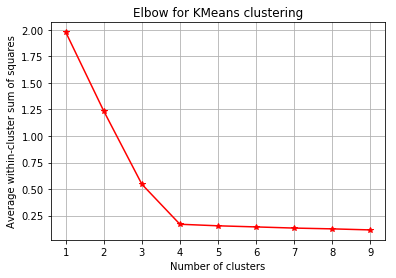

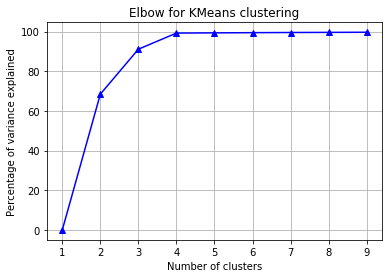

In [16]:
elbow(nd, range(1,10))

## With the number of clusters considered as the initial guess, and the results obtained via Silhouette score and elbow graph, the result seems consistent. PCA seemed to have helped a lot, particularly in this case, where it was easily descernable that the data could easily be clustered in 4 sections.

In [0]:
from sklearn.mixture import GaussianMixture as gm
gaus_learn= gm(n_components=4,random_state=2710).fit(nd)
gaus_pred = gaus_learn.predict(nd)

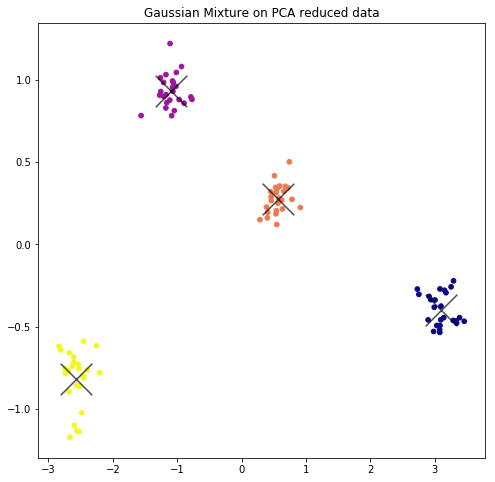

In [18]:
plt.clf
plt.figure(figsize = (8,8))
plt.scatter(np.asarray(nd.loc[:, 'PC1']), np.asarray(nd.loc[:, 'PC2']), c=gaus_pred, s=22, cmap='plasma')
plt.title('Gaussian Mixture on PCA reduced data')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='black', s=1000, alpha=0.7);
plt.show()

## Question 2. 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [19]:
nydata = pd.read_csv('/content/drive/My Drive/Untitled folder/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
nydata.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,1,0,1,0,0,0,0,0,Unspecified,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,0,0,0,0,0,0,0,0,Fell Asleep,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [20]:
nyc_d = nydata[['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'UNIQUE KEY']].copy()
nyc_d.head()

,ZIP CODE,LATITUDE,LONGITUDE,UNIQUE KEY
0,,40.7331,-73.9548,3781862
1,,40.7535,-73.8979,3781130
2,10036,40.7597,-73.9917,3781009
3,11207,,,3780501
4,10030,40.8156,-73.9435,3780511


In [21]:
nyc_d.shape

(680, 4)

In [0]:
for column in nyc_d.columns:
  nyc_d[column] = pd.factorize(nyc_d[column])[0]

In [23]:
nyc_d.head()

,ZIP CODE,LATITUDE,LONGITUDE,UNIQUE KEY
0,0,0,0,0
1,0,1,1,1
2,1,2,2,2
3,2,3,3,3
4,3,4,4,4


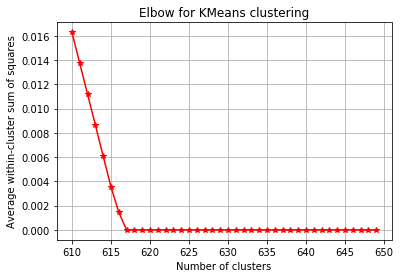

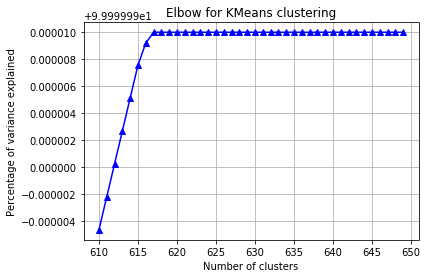

In [24]:
elbow(nyc_d, range(610, 650))

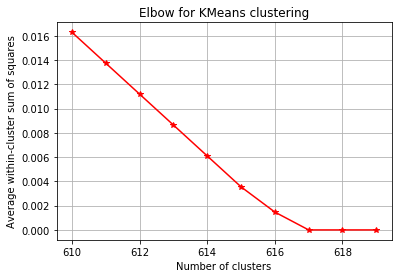

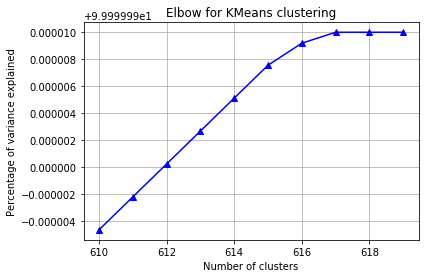

In [25]:
elbow(nyc_d, range(610, 620))

## Using the Elbow method we can easily conclude that after 617 there is hardly any change in the information, which clearly means k = 617. This if there is no more changes in information that means, there can be only 617 clusters, which ultimately implies that there are 617 unique records.

In [26]:
holder  = nyc_d.loc[nyc_d.duplicated() == True] 
print("The total number of records = {}, out of which duplicated records = {}, Therefore, the total number of unique records = {}".format(len(holder),len(nyc_d), len(nyc_d)-len(holder)))

The total number of records = 63, out of which duplicated records = 680, Therefore, the total number of unique records = 617


## Question 3.

### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [27]:
#load the data
data1=pd.read_csv("/content/drive/My Drive/Untitled folder/stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,214.0,316.0,115.0,73.0,201.0,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,123.0,190.0,56.0,54.0,214.0,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,181.0,278.0,150.0,71.0,128.0,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,147.0,138.0,91.0,75.0,140.0,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,598.0,626.0,373.0,284.0,807.0,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [28]:
#considering only the in-day timeline 
data1=data1.iloc[:,-6:]
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

In [29]:
new_data = data1.copy()
new_data['Totals'] = new_data.sum(axis=1)
temp = new_data.sort_values(by="Totals", ascending = False)
temp.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Totals
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


## The top 5 zip codes with most stops are: 10456, 10454, 11212, 11207, 11691

In [30]:
tempx = temp.head().copy()
tempx.reset_index(inplace=True)
tempx.columns

Index(['zipcode', 'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6',
       'Totals'],
      dtype='object')

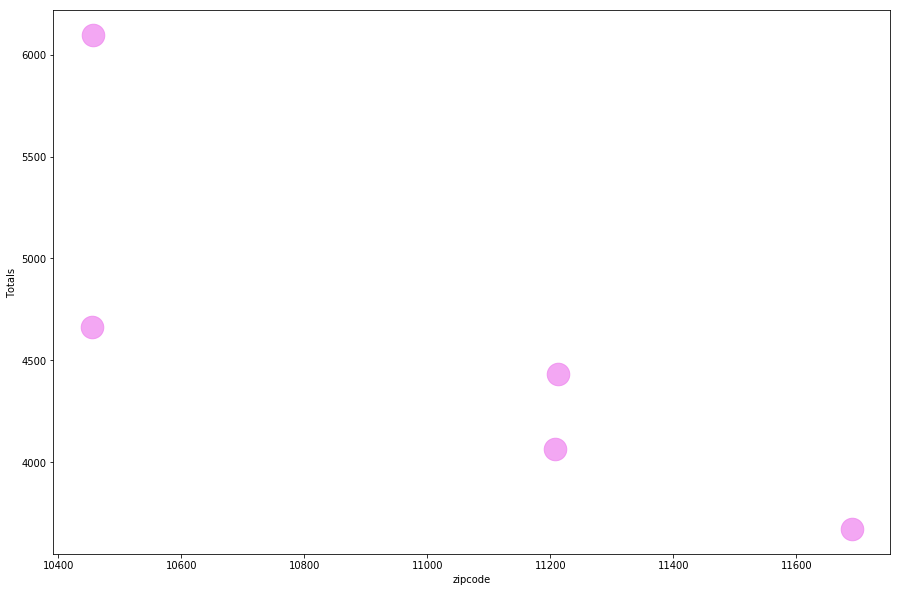

In [31]:
plt.clf
tempx.plot(x="zipcode", y="Totals", kind = 'scatter', figsize = (15,10), s = 510, alpha = 0.7, c='violet')

In [32]:
temp1=temp.loc[temp['Totals']>30]
temp1.sort_values(by='Totals', ascending = True)
temp1.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Totals
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


## ^ Dataframe with at least 30 stop and frisk obersvations

# Say, I choose number of clulsters(K) as 10

In [33]:
temp.shape

(183, 7)

In [34]:
temp.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Totals
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [0]:
#performing k-means
from sklearn.cluster import KMeans

#creating a k-means model with 2 clusters
kmeans = KMeans(n_clusters=10, random_state=911)
kmeans.fit(temp)
labels = kmeans.predict(temp)

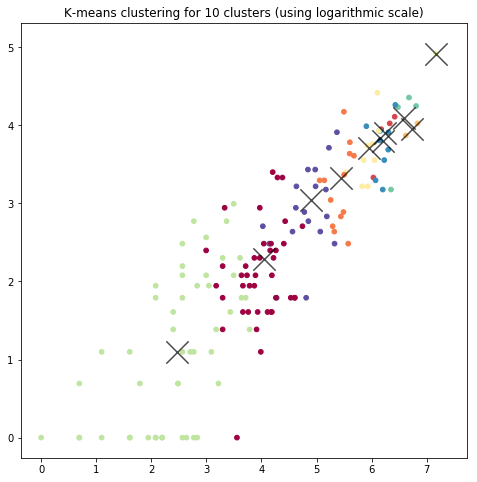

In [36]:
#plot
plt.clf
plt.figure(figsize = (8,8))
centers = kmeans.cluster_centers_
plt.scatter(np.log(temp.loc[:, 'time_1']), np.log(temp.loc[:, 'time_2']), c=labels, s=22, cmap='Spectral')
plt.scatter(np.log(centers[:, 0]), np.log(centers[:, 1]), marker = 'x', c='black', s=500, alpha=0.7);
plt.title('K-means clustering for 10 clusters (using logarithmic scale)')
plt.show()



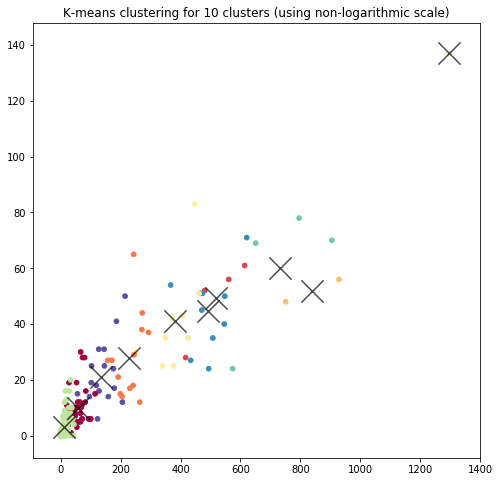

In [37]:
plt.figure(figsize = (8,8))
plt.scatter(temp.loc[:, 'time_1'], temp.loc[:, 'time_2'], c=labels, s=22, cmap='Spectral')
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='black', s=500, alpha=0.7);
plt.title('K-means clustering for 10 clusters (using non-logarithmic scale)')
plt.show()

## Finding the best possible number of clusters for this dataset


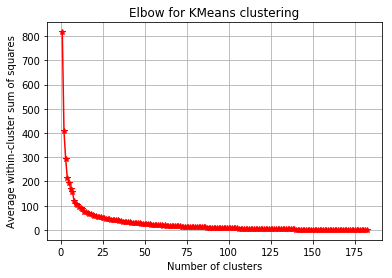

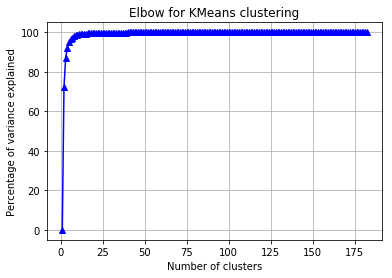

In [38]:
elbow(temp, range(1, temp.shape[0]))

## Since the higher range does not give a good observational visualization, trying the elbow method with smaller range!

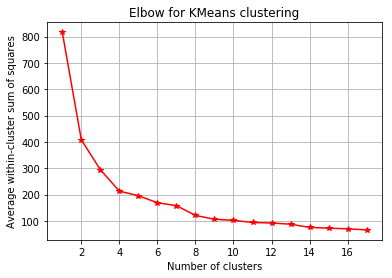

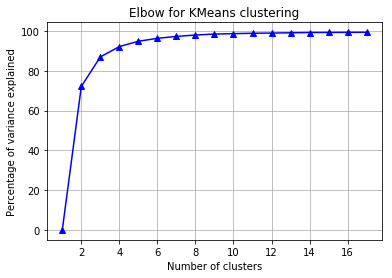

In [39]:
elbow(temp, range(1, int(temp.shape[0]/10)))

## Getting the silhouette scores for a range of clusters! 
# Printing S_scores for only those cluster with more than 70% rate

In [40]:
for num in range(2,temp.shape[0]):
  k_means = KMeans(n_clusters=num, random_state=1403).fit(temp)
  labels = k_means.labels_
  s_score = silhouette_score(temp, labels)
  if s_score>0.6:
    print("S-score for cluster {} is {}".format(num,s_score))

S-score for cluster 2 is 0.7721312183526409
S-score for cluster 3 is 0.7393644912693186
S-score for cluster 4 is 0.6905348416151763
S-score for cluster 5 is 0.6902193994590481
S-score for cluster 6 is 0.6713456776946395
S-score for cluster 7 is 0.6716102716608665


## From the elbow method we can observe that when number of clusters = 3 the classification carried out has a significant performce whereafter it decreases. The same is supported by the Silhouette scores that show that after K=3 there are no clusters that retain at least 70% scores.

## The reason for choosing k = 10 was generally a higher number of clustering gives a wider picture of the data distribution, also when K is relatively higher, we can see no effect of clustering, thus we can make a safe assumption that K will be lesser than the chosen value


In [0]:
#performing k-means
from sklearn.cluster import KMeans

#creating a k-means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=911)
kmeans.fit(temp)
labels = kmeans.predict(temp)


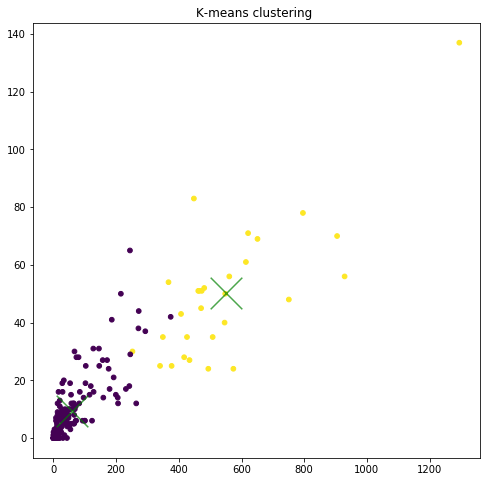

In [42]:
#plot
plt.clf
plt.figure(figsize = (8,8))
centers = kmeans.cluster_centers_
plt.scatter(temp.loc[:, 'time_1'], temp.loc[:, 'time_2'], c=labels, s=22, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', c='green', s=1000, alpha=0.7);
plt.title('K-means clustering ')
plt.show()

In [0]:
from sklearn.mixture import GaussianMixture as gm
gaus_learn= gm(n_components=2,random_state=311).fit(temp)
gaus_pred = gaus_learn.predict(temp)

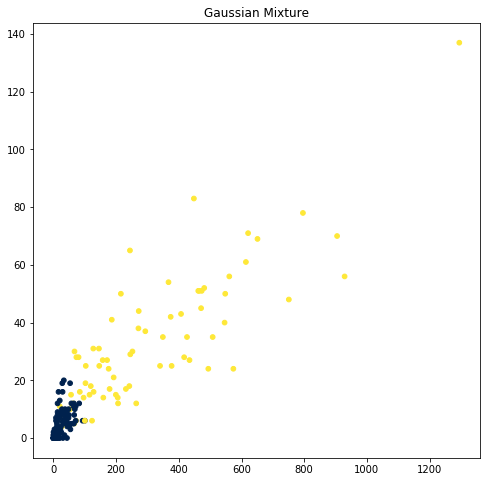

In [44]:
plt.clf
plt.figure(figsize = (8,8))
plt.scatter(temp.loc[:, 'time_1'], temp.loc[:, 'time_2'], c=gaus_pred, s=22, cmap='cividis')
plt.title('Gaussian Mixture')
plt.show()